Данные о погоде: https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)

Данные об индексе промышленного производства:
[Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)

**Конкурсное ДЗ:**.

* Взять данные об индексе промышленного производства с 2010 года: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)
* Построить модели аналогично тем, которые строились на вебинаре
* Выбрать лучшую модель
* Отправить ссылку файл с анализом через Google Форму в Telegram чате.

*  **Дедлайн:** 20:00 по МСК

 
Нажимаем кнопку "Выбрать в файл GZ (архив)" и формат файла Excel файлом за интересующий период (с 2016 года). Рядом появляется ссылка "Скачать". Правая кнопка мыши -> Копировать ссылку
 
Пример команды для скачивания (подставить свою ссылку):
 
```!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz"```
 
Распаковка архива:
 
```!gzip -df "weather.xls.gz"```
 
Ссылка на вебинар:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-podvodim-itogi150521/

# Инструкция по отправке ДЗ
Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.

In [ ]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://37.9.3.253/download/files.synop/27/27612.13.05.2016.13.05.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2021-05-15 18:08:00--  http://37.9.3.253/download/files.synop/27/27612.13.05.2016.13.05.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.253:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213436 (1.2M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.16M   841KB/s    in 1.4s    

2021-05-15 18:08:02 (841 KB/s) - ‘weather.xls.gz’ saved [1213436/1213436]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_excel('weather.xls', skiprows=6)
# Преобразовать российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

# Для прогнозирования нужно выявить зависимости от каких-то факторов (для этого генерируем новые факторы)
data['dayofyear'] = data['date'].dt.dayofyear
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour

# Оставим только непустые значения в таблице
condition = data['T'].notna()
data = data[condition]

In [ ]:
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,dayofyear,month,hour
0,13.05.2021 21:00,14.2,748.0,762.1,0.2,65.0,"Ветер, дующий с юга",2,NaN,10.0,40%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,19.8,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,7.6,Следы осадков,12.0,NaN,NaN,NaN,NaN,2021-05-13 21:00:00,133,5,21
1,13.05.2021 18:00,16.4,747.8,761.8,-0.9,53.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,"90 или более, но не 100%",Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,"Высококучевые просвечивающие, расположенные на...",Перистые плотные в виде клочьев или скрученных...,10.0,6.6,Следы осадков,12.0,NaN,NaN,NaN,NaN,2021-05-13 18:00:00,133,5,18
2,13.05.2021 15:00,19.3,748.7,762.6,-0.7,43.0,"Ветер, дующий с юга",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 15:00:00,133,5,15
3,13.05.2021 12:00,18.7,749.4,763.3,-0.9,41.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 12:00:00,133,5,12
4,13.05.2021 09:00,15.0,750.3,764.5,-0.7,56.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,20–30%.,,NaN,NaN,8.5,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,6.2,0.1,12.0,Затопленная водой.,9.0,NaN,NaN,2021-05-13 09:00:00,133,5,9
5,13.05.2021 06:00,9.6,751.0,765.4,0.6,87.0,"Ветер, дующий с востока",1,NaN,NaN,Облаков нет.,,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.6,0.6,12.0,NaN,NaN,NaN,NaN,2021-05-13 06:00:00,133,5,6
6,13.05.2021 03:00,10.5,750.4,764.8,0.9,83.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,Облаков нет.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 03:00:00,133,5,3
7,13.05.2021 00:00,15.0,749.5,763.6,-0.2,79.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,11.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 00:00:00,133,5,0
8,12.05.2021 21:00,15.2,749.7,763.8,-0.7,79.0,"Ветер, дующий с востока",1,NaN,15.0,100%.,Ливневый(ые) дождь(и) слабый(ые) в срок наблюд...,Гроза (грозы) с осадками или без них.,Ливень (ливни).,NaN,24.4,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,4.0,11.6,3,12.0,NaN,NaN,NaN,NaN,2021-05-12 21:00:00,132,5,21
9,12.05.2021 18:00,15.7,750.4,764.5,-0.6,82.0,"Ветер, дующий с юго-юго-востока",2,NaN,15.0,100%.,Ливневый(ые) дождь(и) слабый(ые) в срок наблюд...,Гроза (грозы) с осадками или без них.,Ливень (ливни).,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,4.0,12.6,3,12.0,NaN,NaN,NaN,NaN,2021-05-12 18:00:00,132,5,18


In [ ]:
data.columns  # атрибут объекта - список колонок

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'date',
       'dayofyear', 'month', 'hour'],
      dtype='object')

In [ ]:
# Pandas DataFrame (наша data) - это таблицы, которые хранятся по столбцам, т.е. если мы хотим получить данные о температуре 
# в строке 15, мы в квадратных скобках пишем сначала название колонки, потом номер строки
data['T']

0        14.2
1        16.4
2        19.3
3        18.7
4        15.0
         ... 
14608    13.3
14609    11.3
14610     6.1
14611     6.0
14612     8.2
Name: T, Length: 14612, dtype: float64

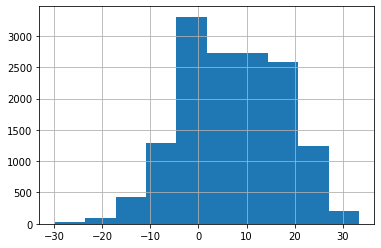

In [ ]:
# Гистограмма - график, который показывает, сколько раз встречалось то или иное значние
data['T'].hist()

In [ ]:
data['T'].max(), data['T'].min(), data['T'].mean()

(33.4, -29.9, 6.979024089789161)

In [ ]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,dayofyear,month,hour
0,13.05.2021 21:00,14.2,748.0,762.1,0.2,65.0,"Ветер, дующий с юга",2,NaN,10.0,40%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,19.8,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,7.6,Следы осадков,12.0,NaN,NaN,NaN,NaN,2021-05-13 21:00:00,133,5,21
1,13.05.2021 18:00,16.4,747.8,761.8,-0.9,53.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,"90 или более, но не 100%",Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,"Высококучевые просвечивающие, расположенные на...",Перистые плотные в виде клочьев или скрученных...,10.0,6.6,Следы осадков,12.0,NaN,NaN,NaN,NaN,2021-05-13 18:00:00,133,5,18
2,13.05.2021 15:00,19.3,748.7,762.6,-0.7,43.0,"Ветер, дующий с юга",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 15:00:00,133,5,15
3,13.05.2021 12:00,18.7,749.4,763.3,-0.9,41.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 12:00:00,133,5,12
4,13.05.2021 09:00,15.0,750.3,764.5,-0.7,56.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,20–30%.,,NaN,NaN,8.5,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,6.2,0.1,12.0,Затопленная водой.,9.0,NaN,NaN,2021-05-13 09:00:00,133,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,13.05.2016 12:00,13.3,745.6,759.8,-0.8,33.0,"Ветер, дующий с северо-востока",2,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Кучевые плоские или кучевые разорванные, или т...",20–30%.,1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-2.7,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-13 12:00:00,134,5,12
14609,13.05.2016 09:00,11.3,746.4,760.6,0.2,43.0,"Ветер, дующий с востока",2,NaN,NaN,"10% или менее, но не 0",,NaN,NaN,4.0,NaN,"Кучевые плоские или кучевые разорванные, или т...","10% или менее, но не 0",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-1.0,Осадков нет,12.0,Поверхность почвы сухая (без трещин и без заме...,4.0,NaN,NaN,2016-05-13 09:00:00,134,5,9
14610,13.05.2016 06:00,6.1,746.2,760.7,0.4,63.0,"Ветер, дующий с северо-востока",1,NaN,NaN,Облаков нет.,,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-0.5,Осадков нет,12.0,NaN,NaN,NaN,NaN,2016-05-13 06:00:00,134,5,6
14611,13.05.2016 03:00,6.0,745.8,760.3,0.3,66.0,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-13 03:00:00,134,5,3


In [ ]:
# Посмотрим, от какого из признаков больше зависит температура
# Агрегируем данные (по месяцу, по дню в году)

# Таблица - средняя температрура в месяц
data.groupby('month').mean()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,dayofyear,hour
month,,,,,,,,,,,,,,,,
1,-4.899113,746.696935,761.840645,-0.007339,84.663710,1.255645,10.000000,10.696429,-6.367097,-3.536129,6.763871,-7.157984,12.00,NaN,16.000000,10.500000
2,-5.149645,747.055674,762.225355,0.009309,80.228723,1.327128,11.470588,11.695122,-7.348043,-2.905714,7.749503,-8.188652,12.00,NaN,45.602837,10.500000
3,0.080403,745.681855,760.518065,0.000808,69.911290,1.294355,10.666667,11.140625,-3.088065,3.494156,8.581633,-5.349516,12.00,1.000000,75.200000,10.500000
4,6.710417,746.827333,761.329833,0.012260,59.856667,1.308333,11.117647,11.594059,2.411628,11.291333,9.057796,-1.706333,12.00,2.024000,105.700000,10.500000
5,13.706490,746.955689,761.079567,0.004674,62.141827,1.205929,10.833333,11.078125,8.749038,18.821795,8.883878,5.443750,12.00,8.644737,136.301282,10.500000
6,17.699417,746.303500,760.208167,-0.018750,63.259167,0.973333,10.333333,11.131579,12.608306,22.784000,9.007960,9.656750,12.02,13.106667,166.900000,10.500000
7,18.955780,743.995796,757.779790,0.023601,72.821342,0.856103,12.750000,11.540541,14.911650,23.801290,8.449637,13.415764,12.00,15.272727,197.405821,10.513339
8,18.414919,748.205484,762.094194,0.017097,70.037097,0.820161,10.000000,10.416667,13.602273,23.565806,8.686659,12.088468,12.00,13.908497,228.400000,10.500000
9,13.054083,748.702000,762.885417,-0.007339,74.371143,0.875833,11.000000,11.052632,9.499667,17.350000,8.516830,8.094829,12.00,9.000000,258.900000,10.500000


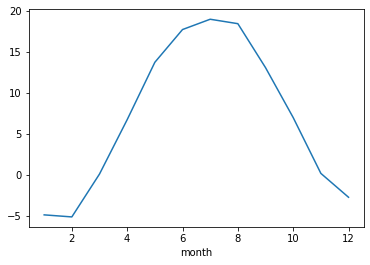

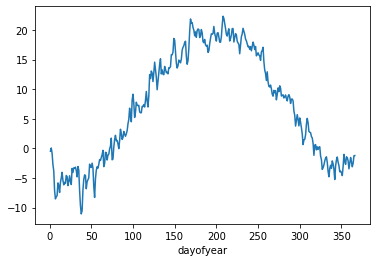

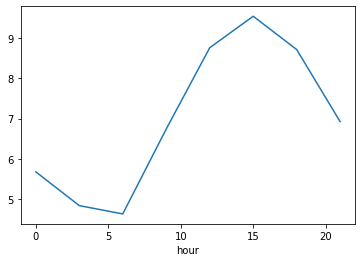

In [ ]:
data.groupby('month').mean()['T'].plot()
plt.show()  # Отрисовать график и начать новый график (а не рисовать все линии на одном графике)
data.groupby('dayofyear').mean()['T'].plot()
plt.show()
data.groupby('hour').mean()['T'].plot()
plt.show()

In [ ]:
data_daily = data.groupby('hour').mean()

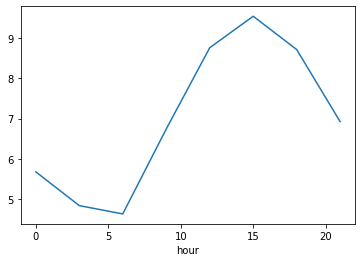

In [ ]:
data_daily['T'].plot()

In [ ]:
data_daily

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,dayofyear,month
hour,,,,,,,,,,,,,,,,
0,5.682913,747.585487,762.151041,0.065551,79.829135,0.848302,10.600000,11.547170,NaN,NaN,10.000000,2.187404,NaN,NaN,183.190581,6.522453
3,4.847345,747.513793,762.123974,-0.067726,83.355774,0.798577,11.200000,11.153846,8.325000,NaN,7.829861,2.083142,12.000000,NaN,183.200328,6.522715
6,4.641950,747.479189,762.093702,-0.037315,84.270137,0.834064,NaN,10.950000,3.873930,NaN,6.969765,2.058849,12.000000,9.000000,183.196057,6.522453
9,6.742388,747.620044,762.137130,0.150137,74.489595,1.207010,11.000000,11.000000,3.682821,NaN,7.848678,1.945071,12.000000,9.736638,183.194962,6.522453
12,8.752683,747.632640,762.050219,0.012253,65.503286,1.496166,10.857143,11.135802,NaN,NaN,8.484708,1.686857,NaN,NaN,183.114458,6.519715
15,9.531856,747.382540,761.753859,-0.247397,62.542967,1.478927,11.125000,11.122137,1.000000,NaN,8.613001,1.553038,12.000000,2.000000,183.200328,6.522715
18,8.708210,747.322386,761.735632,-0.060548,66.209633,1.260536,11.000000,11.434426,NaN,11.300000,9.054694,1.671538,12.006601,NaN,183.200328,6.522715
21,6.923700,747.518336,762.018829,0.196274,74.435687,0.912972,12.000000,11.440000,NaN,10.439407,8.760684,2.172140,12.000000,NaN,183.200328,6.522715


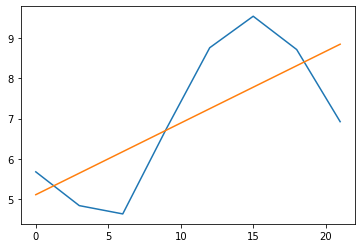

In [ ]:
X = pd.DataFrame()
X['hour'] = data_daily.index
y = data_daily['T']

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)

plt.plot(X['hour'], y)
plt.plot(X['hour'], trend)

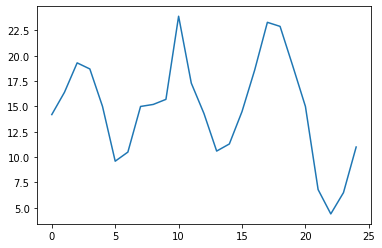

In [ ]:
data_short = data[0:25]
data_short['T'].plot()

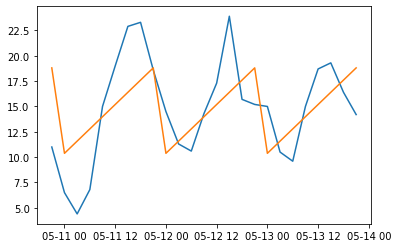

In [ ]:
X = pd.DataFrame()
X['hour'] = data_short['hour']
y = data_short['T']

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)

plt.plot(data_short['date'], y)
plt.plot(data_short['date'], trend)

In [ ]:
model.coef_, model.intercept_

(array([0.40127758]), 10.378048780487804)

In [ ]:
# z = w_0 + w_1*x_1
# z = w_0 + w_1*x_1 + w_2*x_2
# z = w_0 + w_1*sin(x_1) + w_2*cos(x_2), модель = (w_0, w_1, w_2)

In [ ]:
# 2 сезонности в данных - дневная и годичная, оставим только 1 измерение в день для простоты
data = data[data['hour'] == 12]

In [ ]:
# Сгенерируем на основе данных отображение в тригонометрический круг - преобразуем номер дня в году из [0, 365] в [0, 2*pi] и создадим 2 новых столбца sin и cos

In [ ]:
import numpy as np
# 1) преобразование из [0, 365] -> [0, 1] -> [0, 2*pi]

data['scaled_dayofyear'] = data['dayofyear'] / 365 * 2 * np.pi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


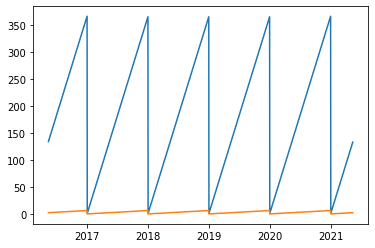

In [ ]:
plt.plot(data['date'], data['dayofyear'])
plt.plot(data['date'], data['scaled_dayofyear'])  # Другой диапазон

In [ ]:
# 2) Преобразование в синус и косинус
data['sin_dayofyear'] = np.sin(data['scaled_dayofyear'])
data['cos_dayofyear'] = np.cos(data['scaled_dayofyear'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,dayofyear,month,hour,scaled_dayofyear,sin_dayofyear,cos_dayofyear
3,13.05.2021 12:00,18.7,749.4,763.3,-0.9,41.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-13 12:00:00,133,5,12,2.289489,0.752667,-0.658402
11,12.05.2021 12:00,17.3,754.3,768.4,-1.5,63.0,"Ветер, дующий с севера",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,10.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-12 12:00:00,132,5,12,2.272275,0.763889,-0.645348
19,11.05.2021 12:00,19.0,756.0,770.0,-0.7,26.0,"Ветер, дующий с востоко-северо-востока",2,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-0.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-11 12:00:00,131,5,12,2.255061,0.774884,-0.632103
27,10.05.2021 12:00,13.6,755.7,770.0,0.2,27.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-10 12:00:00,130,5,12,2.237847,0.785650,-0.618671
35,09.05.2021 12:00,6.3,744.9,759.4,2.0,73.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,100%.,600-1000,NaN,NaN,10.0,1.8,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-09 12:00:00,129,5,12,2.220633,0.796183,-0.605056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14576,17.05.2016 12:00,13.1,746.8,760.9,0.2,76.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-17 12:00:00,138,5,12,2.375560,0.693281,-0.720667
14584,16.05.2016 12:00,12.2,744.4,758.6,0.8,64.0,"Ветер, дующий с северо-востока",2,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-16 12:00:00,137,5,12,2.358346,0.705584,-0.708627
14592,15.05.2016 12:00,15.6,742.3,756.3,-0.3,25.0,"Ветер, дующий с востоко-юго-востока",2,NaN,11.0,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...",Перистые когтевидные или нитевидные или первые...,10.0,-4.4,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-15 12:00:00,136,5,12,2.341132,0.717677,-0.696376
14600,14.05.2016 12:00,16.0,744.1,758.1,-0.9,27.0,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-2.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-14 12:00:00,135,5,12,2.323918,0.729558,-0.683919


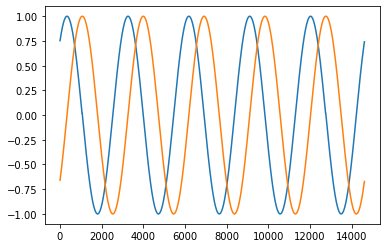

In [ ]:
data['sin_dayofyear'].plot()
data['cos_dayofyear'].plot()


In [ ]:
# Закончили генерацию признаков - теперь строим модель и выбираем лучшую

from sklearn.linear_model import LinearRegression

In [ ]:
# Данные разбиваем на обучающую (тренировочную) и тестовую выборку, потому что нужно всегда проверять качество модели на данных, 
# для которых мы знаем правильный ответ, но модель их еще не видела

In [ ]:
data_train = data[data['date'].dt.year < 2020]
data_test = data[data['date'].dt.year >= 2020]

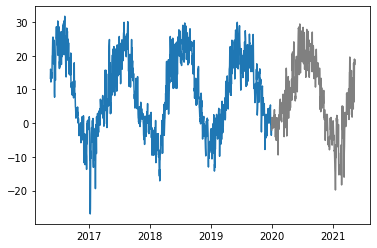

In [ ]:
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')

In [ ]:
# Данные разбиваются на факторы, по которым строится модель (X) и "правильные ответы" (в нашем случае - это температура) - y

In [ ]:
# Признаки: день в году
# Модель: линейная регрессия

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
y_train = data_train['T']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_test = data_test['T']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

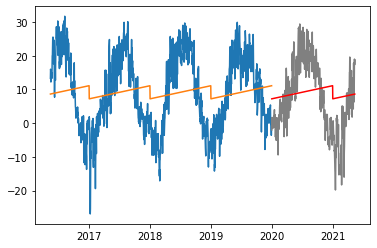

In [ ]:
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')
plt.plot(data_train['date'], predict_train)
plt.plot(data_test['date'], predict_test, color='red')

In [ ]:
# Для оценки моделей будем использовать сумму наименьших квадратов (меньше - лучше)
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict_test))

106.056378753647


26.27680140436915


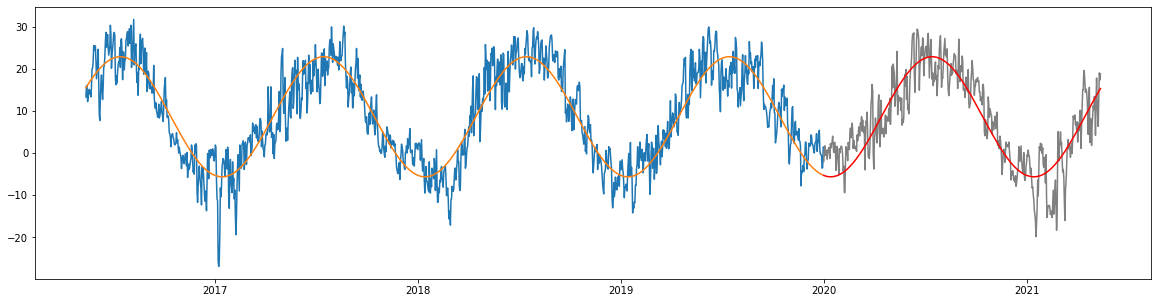

In [ ]:
# Вторая модель на других признаках, которые учитывают цикличность

# Признаки: синус и косинус
# Модель: линейная регрессия

X_train = pd.DataFrame()
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
y_train = data_train['T']

X_test = pd.DataFrame()
X_test['sin_dayofyear'] = data_test['sin_dayofyear']
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')
plt.plot(data_train['date'], predict_train)
plt.plot(data_test['date'], predict_test, color='red')

print(mean_squared_error(y_test, predict_test))

34.791378729681576


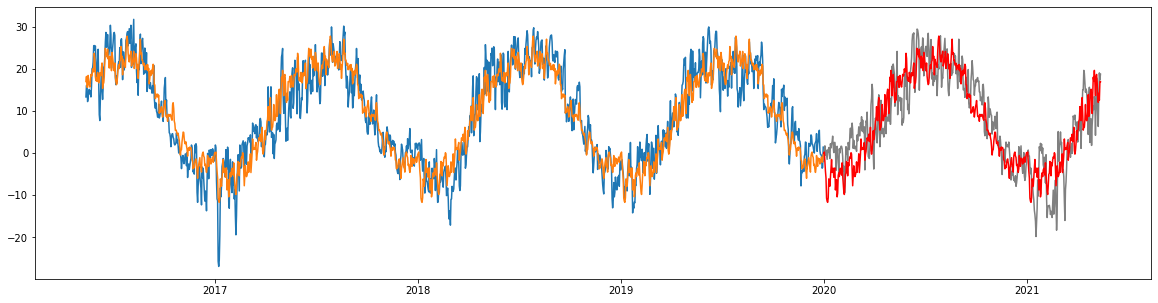

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Признаки: день в году
# Модель: метод решающих деревьев

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
y_train = data_train['T']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_test = data_test['T']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')
plt.plot(data_train['date'], predict_train)
plt.plot(data_test['date'], predict_test, color='red')

print(mean_squared_error(y_test, predict_test))

34.79049195613449


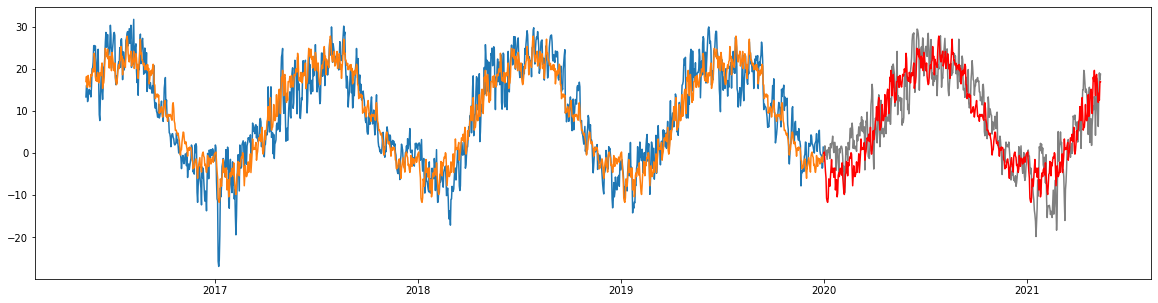

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Признаки: синус и косинус
# Модель: метод решающих деревьев

X_train = pd.DataFrame()
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
y_train = data_train['T']

X_test = pd.DataFrame()
X_test['sin_dayofyear'] = data_test['sin_dayofyear']
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_test = data_test['T']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')
plt.plot(data_train['date'], predict_train)
plt.plot(data_test['date'], predict_test, color='red')

print(mean_squared_error(y_test, predict_test))

30.443078158300267


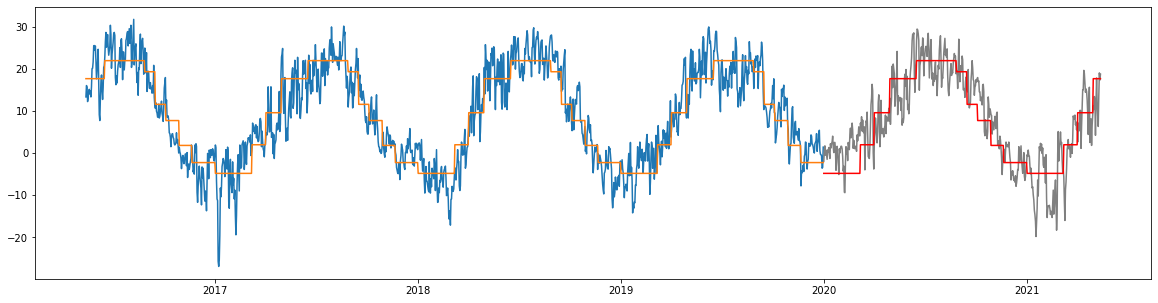

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Признаки: день в году
# Модель: метод решающих деревьев, ограничили количество интервалов, на которые делается разбиение

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
y_train = data_train['T']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_test = data_test['T']

model = DecisionTreeRegressor(max_leaf_nodes=10)  # Изменили параметр - качество немного улучшилось
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'], color='gray')
plt.plot(data_train['date'], predict_train)
plt.plot(data_test['date'], predict_test, color='red')

print(mean_squared_error(y_test, predict_test))

In [ ]:
Резюме
Как разрабатывается модель:
1) Строим графики с описательной статистикой, пытаемся понять какие-то закономерности в данных (в нашем примере - это цикличность)
2) На основе экспертных знаний, жизненного опыта, творчества, здравого смысла генерируем признаки 
(в нашем примере - это синус и косинус от номера дня в году для отображения цикличной сущности в данных)
3) Пробуем модели от простых к более сложным (можно погуглить, какие модели используются для решения похожих задач), пробуем строить модели на разных наборах признаков
4) Анализируем качество каждой модели, выбираем лучшую

# 3 день: Подводим итоги

In [ ]:
# Скачивание файла
#  ! - использовать консольные команды 
#  wget - команда для скачивания из интернета
#  -O "<название файла для сохранения>" - имя файла, которое мы хотим видеть на своем диске
#  "<ссылка на файл в интернете>"

!wget -O "ipg.xls" "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=2010-01-01&coed=2021-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-05-15&revision_date=2021-05-15&nd=1939-01-01"


--2021-05-15 17:39:11--  https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=2010-01-01&coed=2021-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-05-15&revision_date=2021-05-15&nd=1939-01-01
Resolving fred.stlouisfed.org (fred.stlouisfed.org)... 23.74.149.241
Connecting to fred.stlouisfed.org (fred.stlouisfed.org)|23.74.149.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12800 (12K) [application/vnd.ms-excel]
Saving to: ‘ipg.xls’

ipg.xls             100%[===================>]  12.50K  --.-KB/s    in 0.002s  

2021-05-15 17:39:11 (5.11 MB/

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_excel('ipg.xls', skiprows=10)

In [ ]:
data

,observation_date,IPG2211A2N
0,2010-01-01,119.2473
1,2010-02-01,110.7525
2,2010-03-01,98.3430
3,2010-04-01,86.2612
4,2010-05-01,90.8459
...,...,...
131,2020-12-01,115.7565
132,2021-01-01,120.9243
133,2021-02-01,119.1773
134,2021-03-01,99.9442


In [ ]:
data.columns

Index(['observation_date', 'IPG2211A2N'], dtype='object')

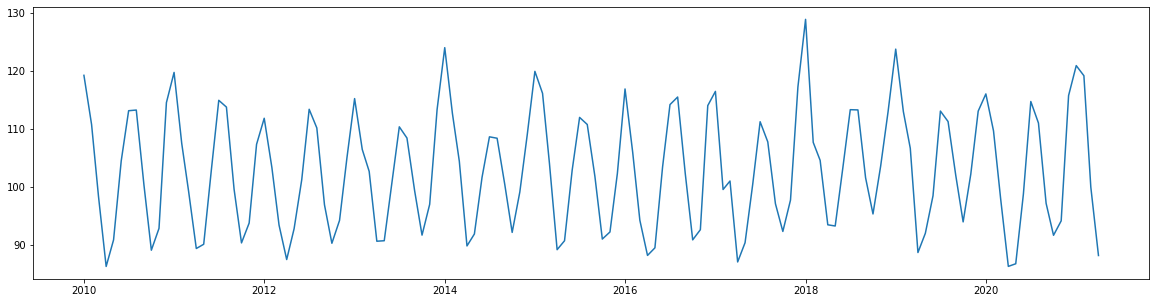

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']
plt.figure(figsize=(20, 5))
plt.plot(x, y)

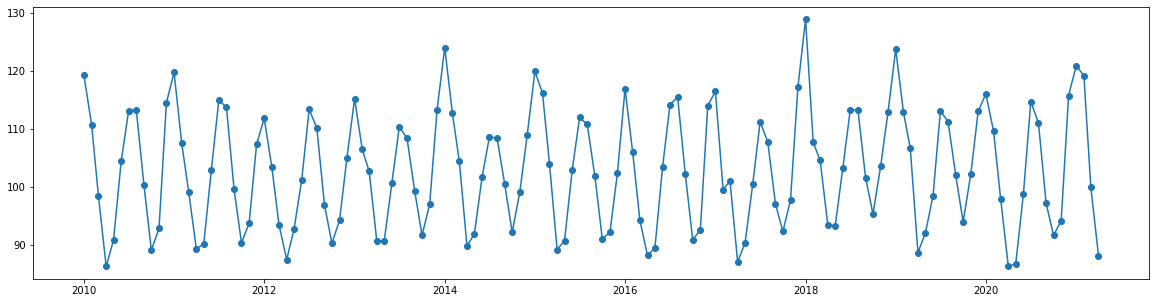

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.scatter(x, y)

In [ ]:
data['month'] = data['observation_date'].dt.month
data['year'] = data['observation_date'].dt.year

In [ ]:
data

,observation_date,IPG2211A2N,month,year
0,2010-01-01,119.2473,1,2010
1,2010-02-01,110.7525,2,2010
2,2010-03-01,98.3430,3,2010
3,2010-04-01,86.2612,4,2010
4,2010-05-01,90.8459,5,2010
...,...,...,...,...
131,2020-12-01,115.7565,12,2020
132,2021-01-01,120.9243,1,2021
133,2021-02-01,119.1773,2,2021
134,2021-03-01,99.9442,3,2021


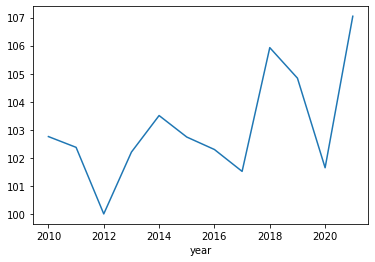

In [ ]:
data.groupby('year')['IPG2211A2N'].mean().plot()

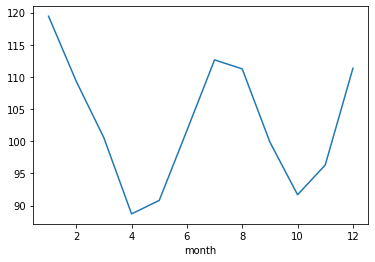

In [ ]:
data.groupby('month')['IPG2211A2N'].mean().plot()

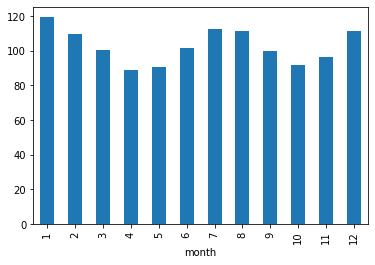

In [ ]:
data.groupby('month')['IPG2211A2N'].mean().plot(kind='bar')

In [ ]:
data['scaled_month'] = data['month'] / 12 * 2 * np.pi

In [ ]:
data['cos_x'] = np.cos(data['scaled_month'])
data['sin_x'] = np.sin(data['scaled_month'])

In [ ]:
data

,observation_date,IPG2211A2N,month,year,scaled_month,cos_x,sin_x
0,2010-01-01,119.2473,1,2010,0.523599,8.660254e-01,5.000000e-01
1,2010-02-01,110.7525,2,2010,1.047198,5.000000e-01,8.660254e-01
2,2010-03-01,98.3430,3,2010,1.570796,6.123234e-17,1.000000e+00
3,2010-04-01,86.2612,4,2010,2.094395,-5.000000e-01,8.660254e-01
4,2010-05-01,90.8459,5,2010,2.617994,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...
131,2020-12-01,115.7565,12,2020,6.283185,1.000000e+00,-2.449294e-16
132,2021-01-01,120.9243,1,2021,0.523599,8.660254e-01,5.000000e-01
133,2021-02-01,119.1773,2,2021,1.047198,5.000000e-01,8.660254e-01
134,2021-03-01,99.9442,3,2021,1.570796,6.123234e-17,1.000000e+00


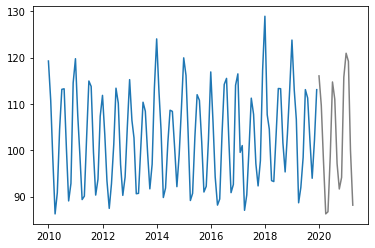

In [ ]:
data_train = data[data['year'] < 2020]
data_test = data[data['year'] >= 2020]

plt.plot(data_train['observation_date'], data_train['IPG2211A2N'])
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')

133.04447781669415


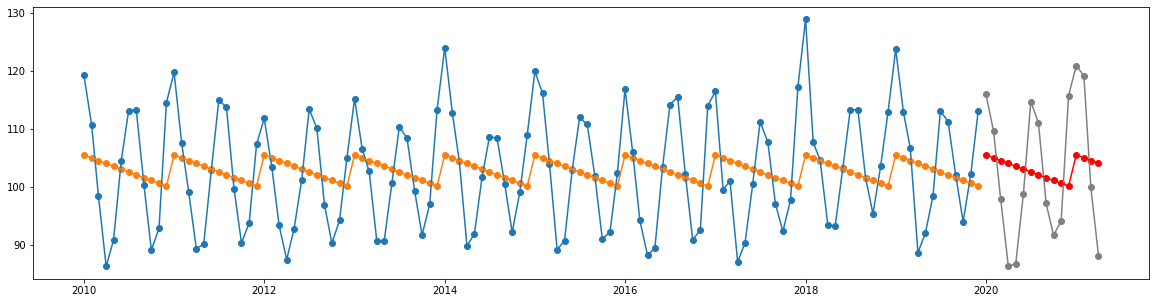

In [ ]:
# Признаки: месяц
# Модель: линейная регрессия

X_train = pd.DataFrame()
X_train['month'] = data_train['month']
y_train = data_train['IPG2211A2N']

X_test = pd.DataFrame()
X_test['month'] = data_test['month']
# X_test['sin_x'] = data_test['sin_x']
y_test = data_test['IPG2211A2N']

model = LinearRegression()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['observation_date'], data_train['IPG2211A2N'])
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.plot(data_train['observation_date'], predict_train)
plt.plot(data_test['observation_date'], predict_test, color='red')

plt.scatter(data_train['observation_date'], data_train['IPG2211A2N'])
plt.scatter(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.scatter(data_train['observation_date'], predict_train)
plt.scatter(data_test['observation_date'], predict_test, color='red')

print(mean_squared_error(y_test, predict_test))

91.45126849518496
120.2006425739698


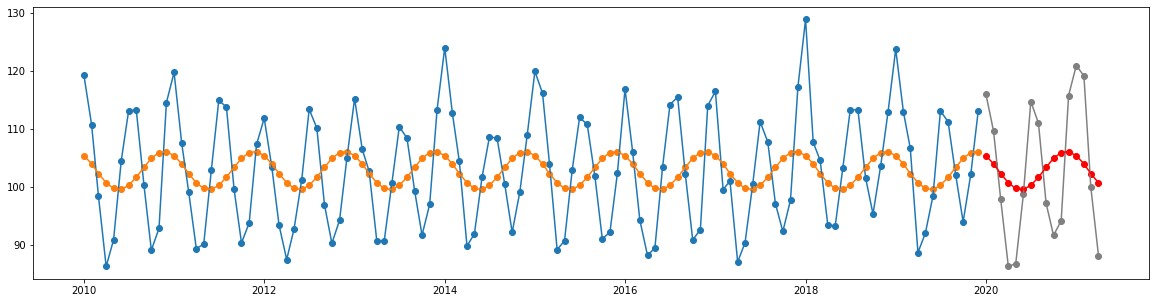

In [ ]:
# Признаки: sin + cos
# Модель: линейная регрессия

X_train = pd.DataFrame()
X_train['sin_x'] = data_train['sin_x']
X_train['cos_x'] = data_train['cos_x']
y_train = data_train['IPG2211A2N']

X_test = pd.DataFrame()
X_test['sin_x'] = data_test['sin_x']
X_test['cos_x'] = data_test['cos_x']
y_test = data_test['IPG2211A2N']

model = LinearRegression()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['observation_date'], data_train['IPG2211A2N'])
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.plot(data_train['observation_date'], predict_train)
plt.plot(data_test['observation_date'], predict_test, color='red')

plt.scatter(data_train['observation_date'], data_train['IPG2211A2N'])
plt.scatter(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.scatter(data_train['observation_date'], predict_train)
plt.scatter(data_test['observation_date'], predict_test, color='red')

print(mean_squared_error(y_train, predict_train))
print(mean_squared_error(y_test, predict_test))

Метрика для тренировочных данных 10.121677349566673
Метрика для тестовых данных 14.140639867974992


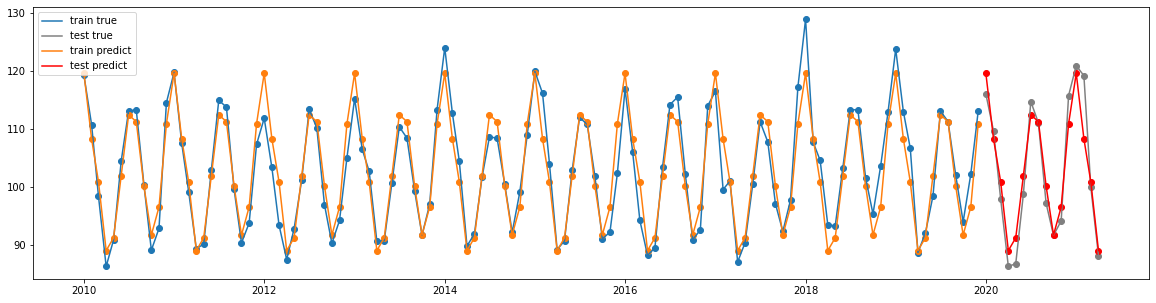

In [ ]:
# Признаки: месяц
# Модель: DecisionTree

X_train = pd.DataFrame()
X_train['month'] = data_train['month']
y_train = data_train['IPG2211A2N']

X_test = pd.DataFrame()
X_test['month'] = data_test['month']
# X_test['sin_x'] = data_test['sin_x']
y_test = data_test['IPG2211A2N']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['observation_date'], data_train['IPG2211A2N'], label='train true')
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray', label='test true')
plt.plot(data_train['observation_date'], predict_train, label='train predict')
plt.plot(data_test['observation_date'], predict_test, color='red', label='test predict')

plt.scatter(data_train['observation_date'], data_train['IPG2211A2N'])
plt.scatter(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.scatter(data_train['observation_date'], predict_train)
plt.scatter(data_test['observation_date'], predict_test, color='red')

plt.legend()

print("Метрика для тренировочных данных", mean_squared_error(y_train, predict_train))
print("Метрика для тестовых данных", mean_squared_error(y_test, predict_test))

In [ ]:
X_train['observation_date'] = data_train['observation_date'] - pd.Timestamp(year=2009, month=1, day=1)
X_train

,observation_date
0,365 days
1,396 days
2,424 days
3,455 days
4,485 days
...,...
115,3864 days
116,3895 days
117,3925 days
118,3956 days


0.0
240.369079798125


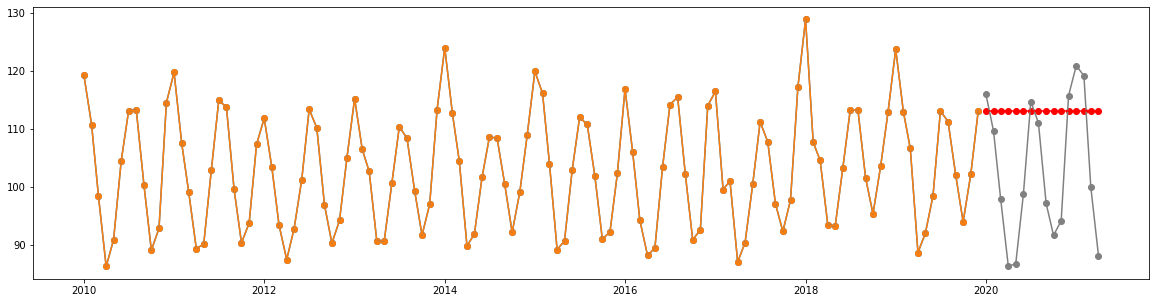

In [ ]:
# Признаки: день
# Модель: линейная регрессия

X_train = pd.DataFrame()
X_train['observation_date'] = (data_train['observation_date'] - pd.Timestamp(year=2009, month=1, day=1)).dt.days
y_train = data_train['IPG2211A2N']

X_test = pd.DataFrame()
X_test['observation_date'] = (data_test['observation_date'] - pd.Timestamp(year=2009, month=1, day=1)).dt.days
y_test = data_test['IPG2211A2N']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # модель обучается, подстраивая коэф. внутри себя под правильные ответы

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['observation_date'], data_train['IPG2211A2N'])
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.plot(data_train['observation_date'], predict_train)
plt.plot(data_test['observation_date'], predict_test, color='red')

plt.scatter(data_train['observation_date'], data_train['IPG2211A2N'])
plt.scatter(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.scatter(data_train['observation_date'], predict_train)
plt.scatter(data_test['observation_date'], predict_test, color='red')

print(mean_squared_error(y_train, predict_train))
print(mean_squared_error(y_test, predict_test))